<a href="https://colab.research.google.com/github/skarot/Statistics/blob/main/Statistics1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing

Purpose of test:
The python packages assumes that the data is distributed in a certain fashion.
We need to run these tests to understand the distribution, then choose the package or algo.

## Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Import data

In [3]:
df = pd.read_csv("winequality-red.csv")

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


target variable or dependent variable is y = quality.

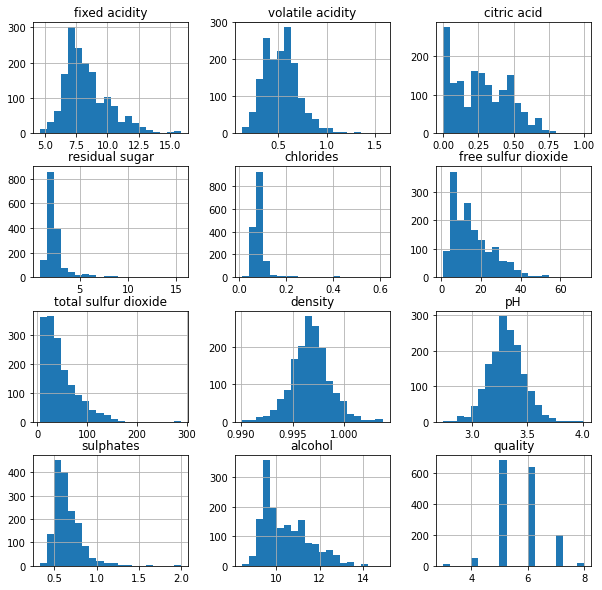

In [6]:
df.hist(bins=20,figsize=(10,10))
plt.show()

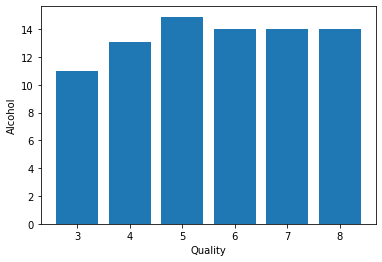

In [10]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

## Normality distribution test:
1) Shapiro Test
2) Normal Test

In [18]:
# Here null-hypothesis is that data is normally distributed(from histogram visually interpretted)

from scipy.stats import shapiro
stat,p = shapiro(df['volatile acidity'])
p = round(p,2)
if p<0.05:
  print("Not normally distributed")

else:
  print("Normally Distributed")
print(f'Stat = {stat}, p = {p}')

Not normally distributed
Stat = 0.9743340611457825, p = 0.0


Hence proved not normally distributed. Now we check for identically distributed.
All the observations have equal probability to occur.

In [20]:
from scipy.stats import normaltest

stat,p = normaltest(df['volatile acidity'])
p = round(p,2)
if p<0.05:
  print("Not normally distributed")

else:
  print("Normally Distributed")
print(f'Stat = {stat}, p = {p}')

Not normally distributed
Stat = 143.4193435598286, p = 0.0


Hence proved again not normally distributed. Now test for correlation.


## Correlation Test: For continuous variables
1) Pearson
2) Spearman's Rank
Assumption - Data is normallly distributed

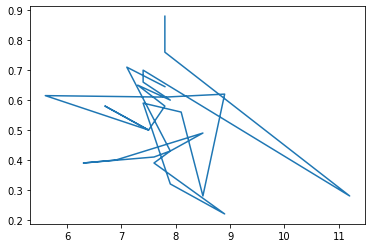

In [26]:
firstCol = df[1:30]['fixed acidity']
secondCol = df[1:30]['volatile acidity']

plt.plot(firstCol,secondCol)
plt.show()

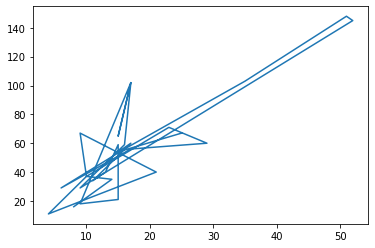

In [30]:
firstCol2 = df[1:30]['free sulfur dioxide']
secondCol2 = df[1:30]['total sulfur dioxide']

plt.plot(firstCol2,secondCol2)
plt.show()

In [27]:
from scipy.stats import pearsonr,spearmanr

stat,p = spearmanr(firstCol,secondCol)
if p<0.05:
  print("Dependent variables")
else:
  print("Independent variables")

Independent variables


In [31]:
from scipy.stats import pearsonr,spearmanr

stat,p = pearsonr(firstCol2,secondCol2)
if p<0.05:
  print("Dependent variables")
else:
  print("Independent variables")

Dependent variables


## Correlation : for Categorical Variables
1) Chi square Test
2) Anova Test

Assumptions - 1) each variable is independent
2) Each box of contigency table > 25 (here we are violating this assumption as we can see we have 20 as one entry in the contigency table)

In [3]:
df = pd.read_csv("loan_data_set.csv")

### Contigency Table

In [6]:
contigency_data = pd.crosstab(df['Gender'],df['Education'],margins = False)

In [7]:
contigency_data

Education,Graduate,Not Graduate
Gender,,
Female,92,20
Male,376,113


In [9]:
from scipy.stats import chi2_contingency
stat, p, dof,expected = chi2_contingency(contigency_data)
if p<0.05:
  print('Dependent')
else:
  print('Independent')

Independent


Test for custom contigency data

In [10]:
contigency__test_data = [[25,50],[50,500]]

In [12]:
contigency__test_data

[[25, 50], [50, 500]]

In [11]:
from scipy.stats import chi2_contingency
stat, p, dof,expected = chi2_contingency(contigency__test_data)
if p<0.05:
  print('Dependent')
else:
  print('Independent')

Dependent


We see that the col1(25) is 2 times col2(50), similary other relationships. this the output is dependent variables.